In [16]:
# notebooks/eda.ipynb

#使用するライブラリをimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#データセットの読み込み
path = '../data/raw/Milling_Tool_Dataset.csv'
df = pd.read_csv(path)

In [17]:
#データセットの基本情報を読み込み
display(df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all'))

(1400, 10)

,vibration_x,vibration_y,vibration_z,acoustic_rms,spindle_load,cutting_speed,feed_rate,material_hardness,tool_wear,RUL
0,0.496714,-1.046911,0.183835,0.512183,49.058988,700,89.438637,200,-0.016767,300.360167
1,-0.137550,0.537225,2.693391,0.445633,49.489214,800,106.324793,300,-0.014253,300.306163
2,0.649118,1.186848,0.350515,0.451009,48.944920,500,124.663485,350,0.035639,299.234463
3,1.525174,0.720669,-1.002982,0.451942,54.873025,700,101.467327,350,0.028692,299.383688
4,-0.231294,0.998335,-0.094035,0.506099,52.122392,500,86.285866,300,0.039730,299.146585


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vibration_x        1400 non-null   float64
 1   vibration_y        1400 non-null   float64
 2   vibration_z        1400 non-null   float64
 3   acoustic_rms       1400 non-null   float64
 4   spindle_load       1400 non-null   float64
 5   cutting_speed      1400 non-null   int64  
 6   feed_rate          1400 non-null   float64
 7   material_hardness  1400 non-null   int64  
 8   tool_wear          1400 non-null   float64
 9   RUL                1400 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 109.5 KB


None

,vibration_x,vibration_y,vibration_z,acoustic_rms,spindle_load,cutting_speed,feed_rate,material_hardness,tool_wear,RUL
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.533667,0.435193,0.224926,0.598278,54.785825,650.714286,125.078337,275.392857,6.994664,149.751711
std,1.037205,0.997682,1.033773,0.076697,5.937026,112.922341,42.987180,55.212786,4.043000,86.845322
min,-3.053991,-2.812130,-2.938598,0.358269,36.135063,500.000000,50.036131,200.000000,-0.016767,0.000000
25%,-0.188028,-0.228511,-0.493857,0.545579,50.705998,575.000000,87.321403,250.000000,3.498253,74.697392
50%,0.530073,0.433421,0.240267,0.599695,54.614293,600.000000,125.264609,300.000000,6.980491,150.056158
75%,1.203454,1.132599,0.899377,0.651599,58.799934,800.000000,162.536556,300.000000,10.488746,224.856065
max,4.002124,3.627431,3.960191,0.815896,76.873296,800.000000,199.950981,350.000000,13.966211,300.360167


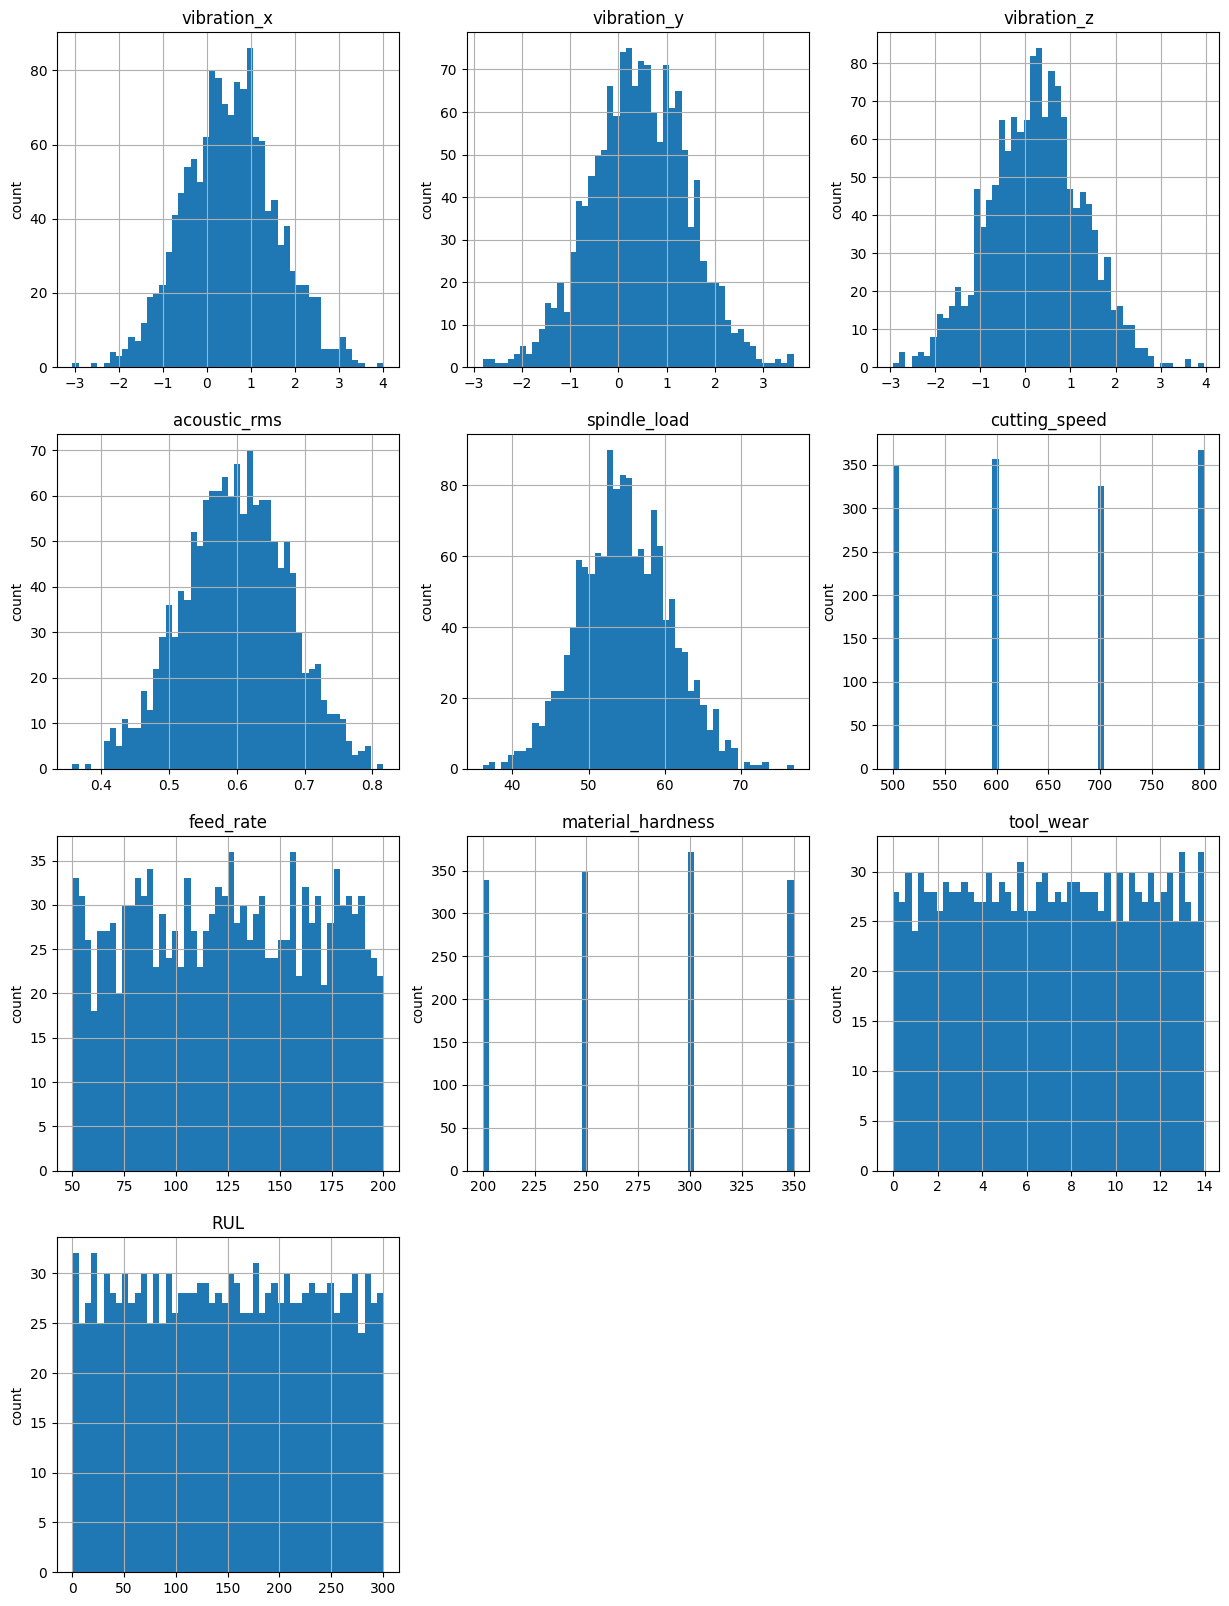

In [19]:
#各要素の分布を確認
def graphing_hist(i):
    df[i].hist(bins=50)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('count')

plt.figure(figsize=(15,20))

for i,j in zip(range(1,11),df.columns):
    plt.subplot(4,3,i)
    df[j].hist(bins=50)
    plt.title(j)
    plt.ylabel('count')

全要素に明らかな外れ値がないことを確認。

「cutting_speed」と「material_hardness」がカテゴリカル変数であることを確認。

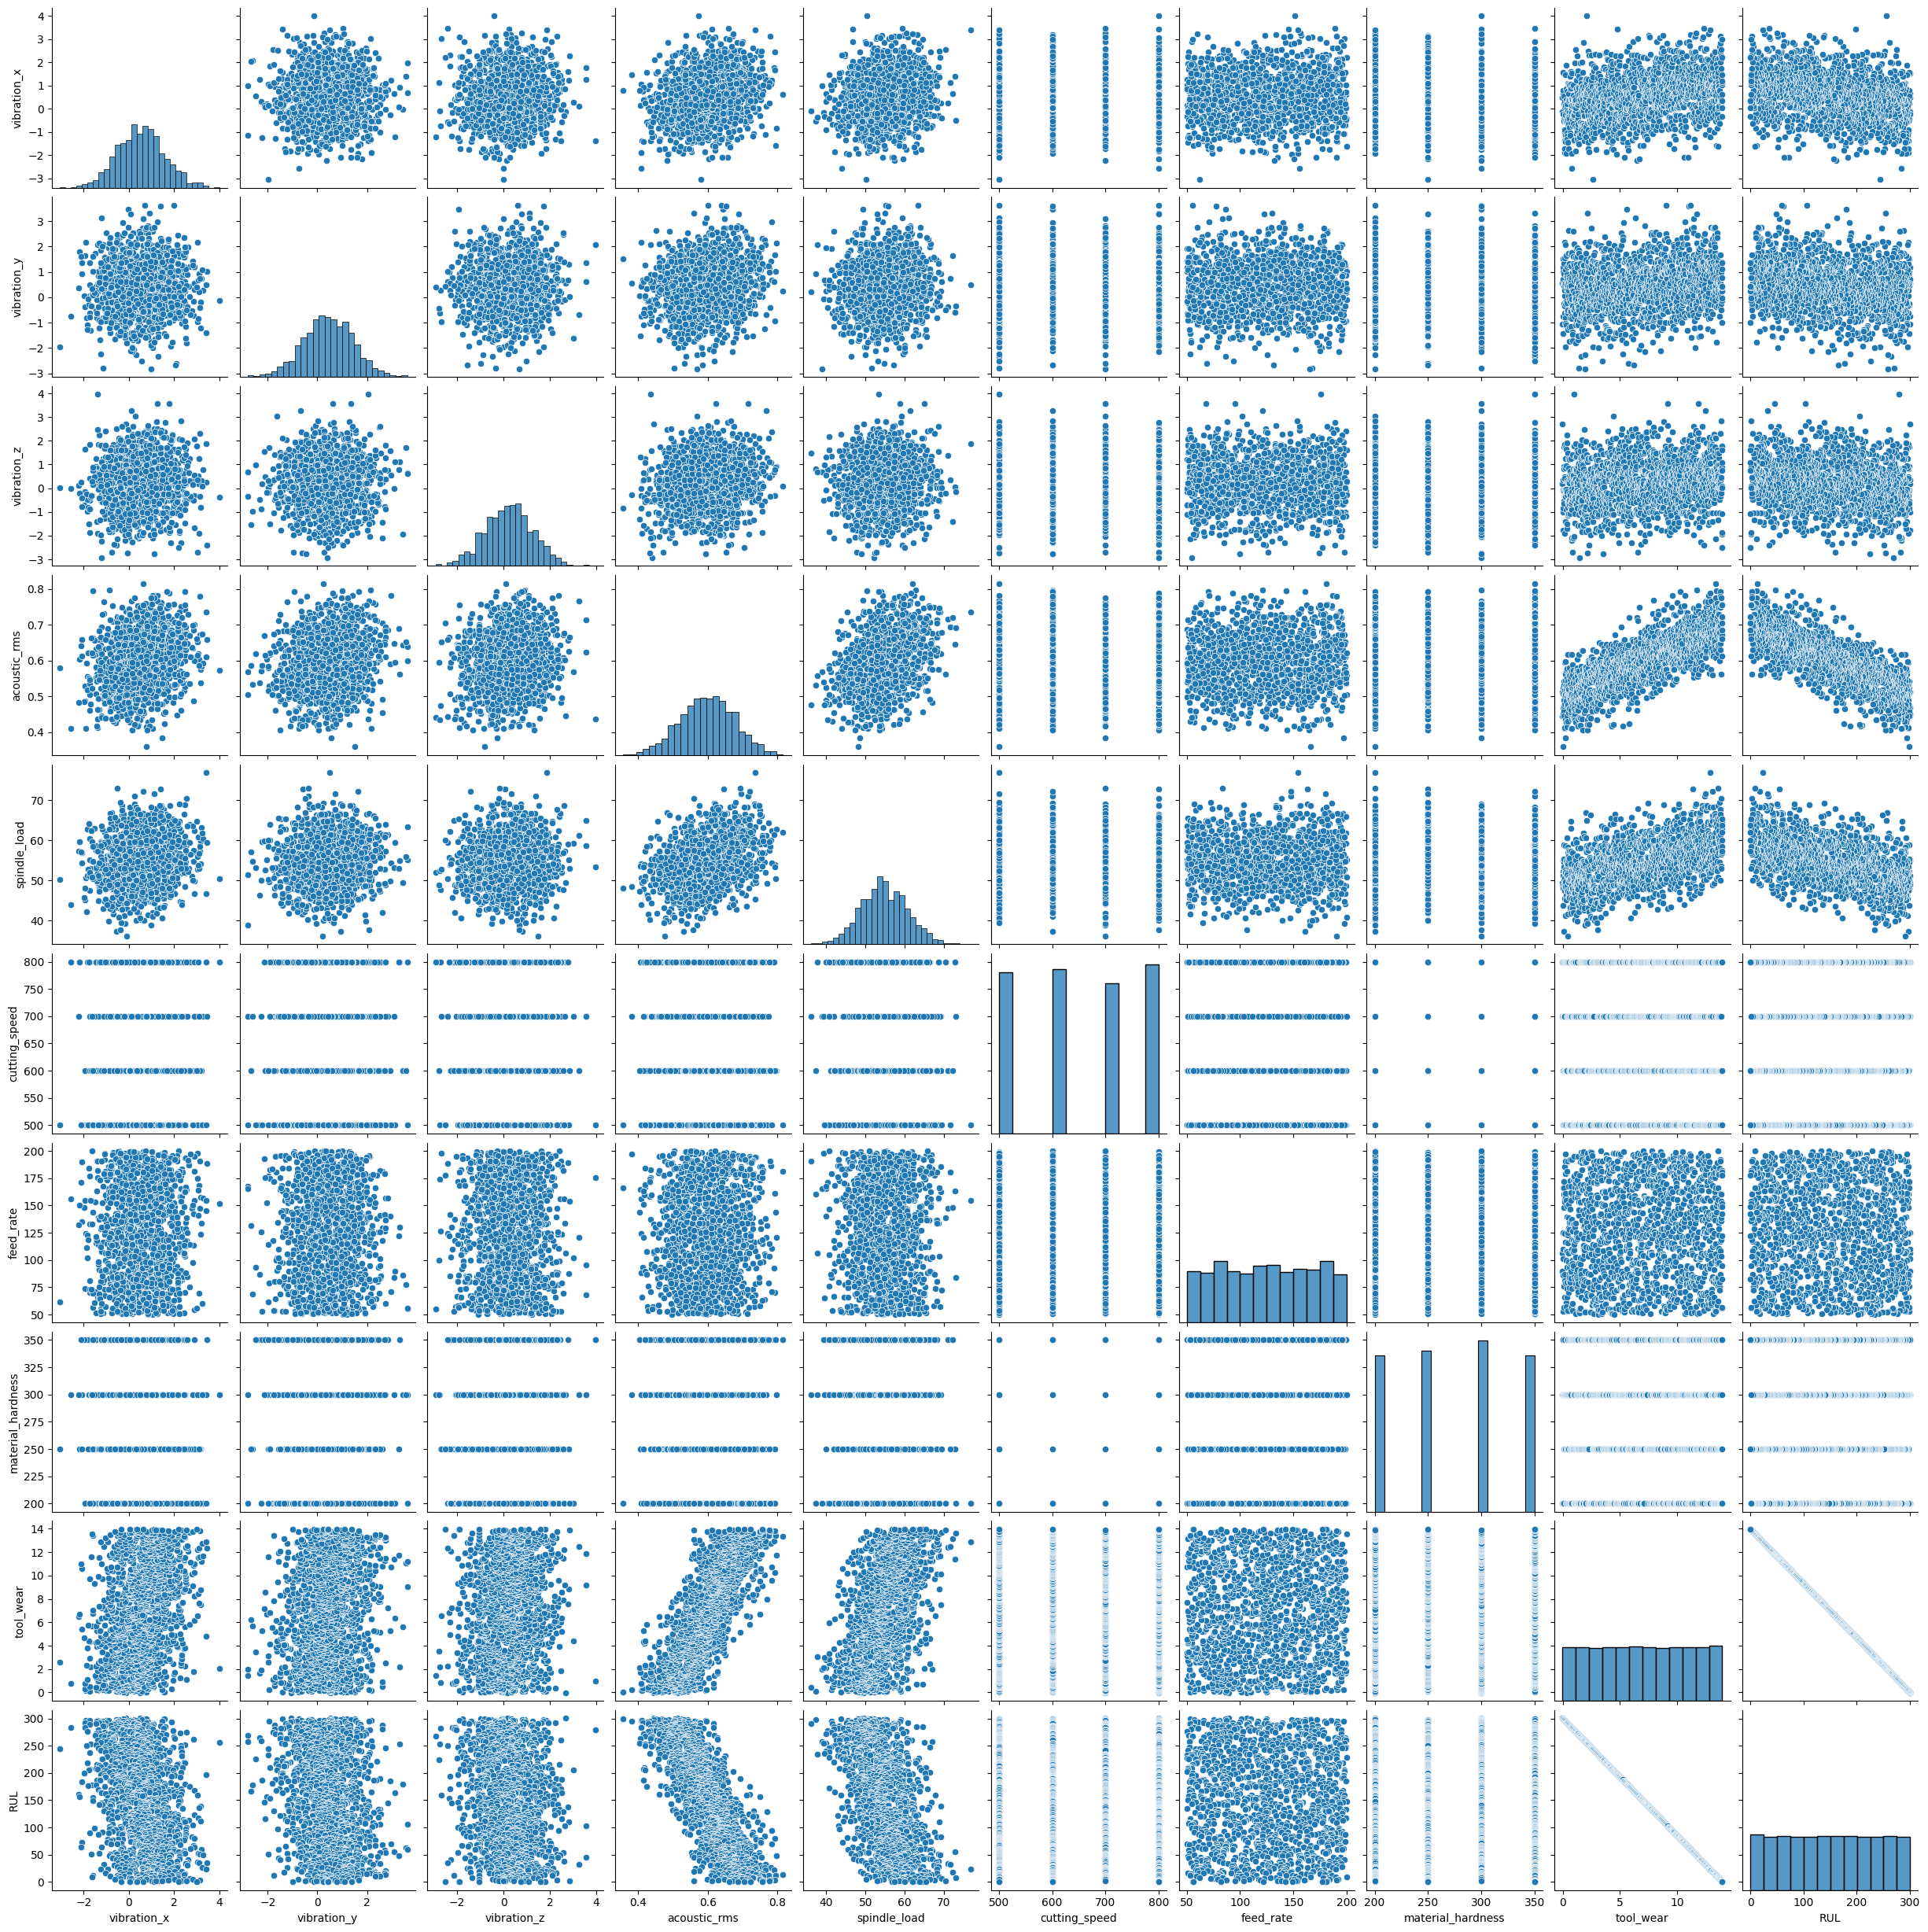

In [12]:
#Check the correlation matrix
sns.pairplot(df)

「tool_wear」と「RULL」に負の相関があることを確認。

「tool_wear」と「acoustic_rms」「spindle_load」に正の相関があるように見える。

「tool_wear」と「vibration_X」「vibration_Y」「vibration_Z」に弱い正の相関があるように見える。

相関係数の数値で実際に確認する。

<Axes: >

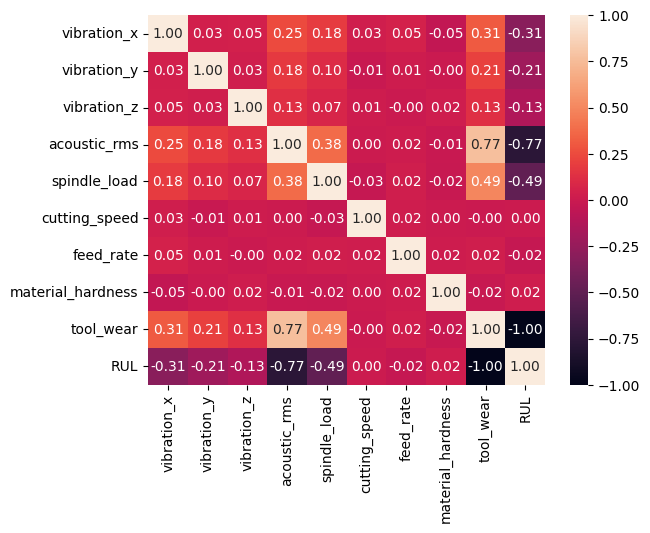

In [15]:
#Check the correlation heatmap
cor = df.corr()
sns.heatmap(cor, annot=True, fmt='.2f', vmin=-1, vmax=1)

相関係数からも「tool_wear」と「RUL」の負の相関関係が確認できた。

「tool_wear」と「automatic_rms」に強い正の相関関係があると推察される。

「tool_wear」と「spindle_load」に中程度の正の相関関係があると推察される。

「tool_wear」と「vibration_X」「vibration_Y」に弱い正の相関関係があると推察される。